In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

log = pd.read_csv("./grid1.txt")

In [7]:
a = log.drop_duplicates().sort_values(by="loss").reset_index()

In [8]:
a.head(10)

,index,x1,x10,y1,y2,loss
0,66,-1,0,-0.139077,0.312373,0.030394
1,65,-1,-1,-0.067978,0.646765,0.057183
2,54,-2,0,-0.278124,0.624678,0.120276
3,55,-2,1,-0.349247,0.290283,0.138158
4,67,-1,1,-0.210193,-0.022092,0.237422
5,43,-3,1,-0.488270,0.602590,0.272666
6,64,-1,-2,0.003106,0.981084,0.317637
7,44,-3,2,-0.559416,0.268193,0.335239
8,53,-2,-1,-0.207016,0.958999,0.336077
9,56,-2,2,-0.420385,-0.044184,0.389876


In [9]:
delta = 1

x = np.arange(-6.0, 6.0, delta)
y = np.arange(-6.0, 6.0, delta)
l =len(x)
Z=np.zeros(shape=(l,l))
X, Y = np.meshgrid(x, y)


In [10]:
for i in range(l):
    Z[i] = a[a["x10"]==-6+i].sort_values(by="x1")["loss"]

<IPython.core.display.Javascript object>


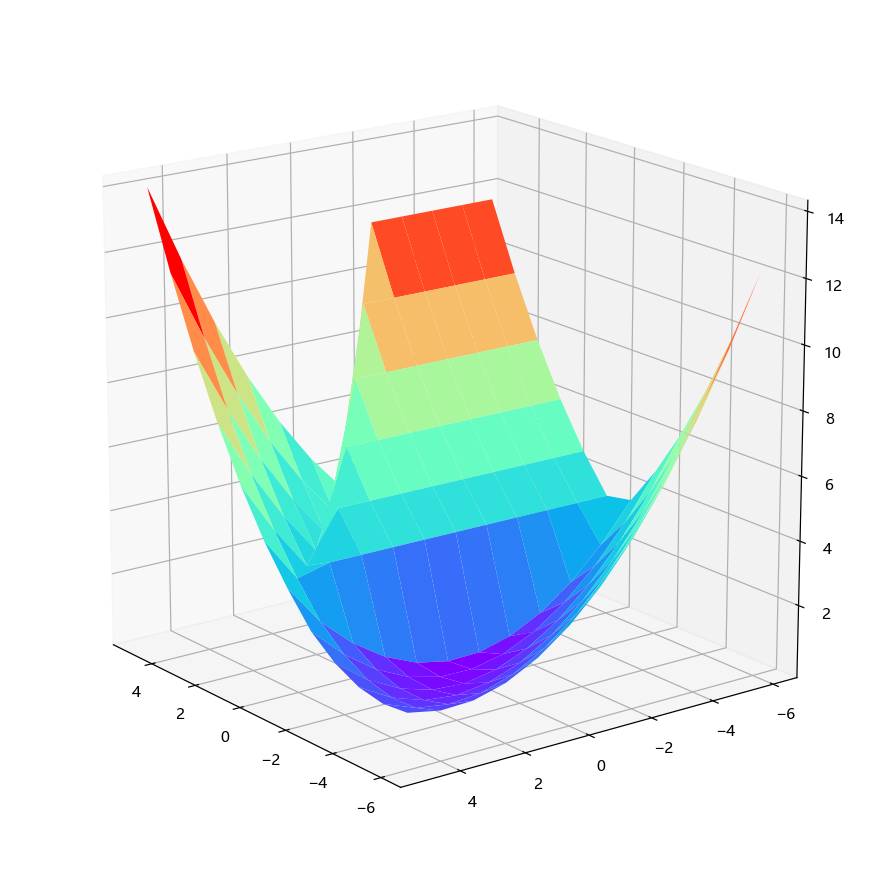

In [11]:

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z,
    rstride=1,
    cstride=1, 
    cmap=plt.get_cmap('rainbow'))
